# Get observation stats for an AOI (with and without cloud masks)

In [13]:
import sys
import os
import osgeo  # needed only if running from Windows
from pathlib import Path
#from shapely.geometry import box
#from xml.dom import minidom
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
sys.path.append(r"cropburn")
from obs_stats import *

In [3]:
# pre-processed AOI can be shapefile or geopackage (eg. from Make_Grid)
aoi_shp_path = os.path.join(r'data','byCell_shp') # (path to folder containing shapefiles - optional)
aoi_geopkg_path = os.path.join(r'data','gridded_aoi.gpkg')
#  geojson path is path to folder containing / to contain geojsons for final geometry query
aoi_geojson_path = os.path.join(r'data','byCell')

out_dir = os.path.join(r'data','Img_Lists')
sensor  ='Planet'  # currently 'Planet' | 'Sentinel' | 'Landsat'
date_start = '2019-10-20'
date_end = '2019-12-10'
cloud_max = 100
image_source = 'Web' #if 'Web', checks stats online directly, else path to folder to gets stats from images already downloaded

grid_file = os.path.join(r'data','Grid_Punjab_UTM.gpkg')
# TODO: make sample image folder
img_dir = "D:/CropBurn/UNQ31/Images_2019" # need to set to folder containing imagery


# 1) Get image lists and summaries for each gridcell / aoi:

### To get obs stats by querying Planet website:

####     if geometry objects are shapefiles or geopkg (then set pre_geom_path to aoi_shp_path or aoi_geopkg_path and aoi_geojson_path to desired location for geojson outputs)

In [4]:
all_obs = get_obs_stats_for_multipoly(date_start, date_end, 'Web', cloud_max, 'Planet', 'PSScene', out_dir, aoi_geojson_path, pre_geom_path=aoi_shp_path)

117
saved list for PlanetResults_2019-10-20to2019-12-10_for_AOI_UNQ_1.csv
{'UNQ': '1', 'max_gap_hrs': 119.70893566972222, 'avg_gap_hrs': 22.59145788201111, 'med_gap_hrs': 23.901382915972224, 'gaps_gt2days': 5, 'gaps_gt3days': 1, 'gaps_gt4days': 1, 'gaps_gt5days': 0}
saved list for PlanetResults_2019-10-20to2019-12-10_for_AOI_UNQ_10.csv
{'UNQ': '10', 'max_gap_hrs': 119.70922577583333, 'avg_gap_hrs': 23.485852639485817, 'med_gap_hrs': 23.809132291666668, 'gaps_gt2days': 7, 'gaps_gt3days': 1, 'gaps_gt4days': 1, 'gaps_gt5days': 0}
saved list for PlanetResults_2019-10-20to2019-12-10_for_AOI_UNQ_11.csv
{'UNQ': '11', 'max_gap_hrs': 142.28180223500001, 'avg_gap_hrs': 26.761750032790406, 'med_gap_hrs': 23.79286340638889, 'gaps_gt2days': 8, 'gaps_gt3days': 2, 'gaps_gt4days': 2, 'gaps_gt5days': 1}
saved list for PlanetResults_2019-10-20to2019-12-10_for_AOI_UNQ_11621.csv
{'UNQ': '11621', 'max_gap_hrs': 118.44715657833333, 'avg_gap_hrs': 22.642576864276727, 'med_gap_hrs': 23.810843509444446, 'gaps_

saved list for PlanetResults_2019-10-20to2019-12-10_for_AOI_UNQ_21.csv
{'UNQ': '21', 'max_gap_hrs': 71.48451260444445, 'avg_gap_hrs': 24.030969835595233, 'med_gap_hrs': 23.54328817861111, 'gaps_gt2days': 7, 'gaps_gt3days': 0, 'gaps_gt4days': 0, 'gaps_gt5days': 0}
saved list for PlanetResults_2019-10-20to2019-12-10_for_AOI_UNQ_22.csv
{'UNQ': '22', 'max_gap_hrs': 95.50103928888889, 'avg_gap_hrs': 26.69597850497531, 'med_gap_hrs': 23.988362661388887, 'gaps_gt2days': 11, 'gaps_gt3days': 1, 'gaps_gt4days': 0, 'gaps_gt5days': 0}
saved list for PlanetResults_2019-10-20to2019-12-10_for_AOI_UNQ_23.csv
{'UNQ': '23', 'max_gap_hrs': 95.48252650333335, 'avg_gap_hrs': 24.00184814076667, 'med_gap_hrs': 23.73859732263889, 'gaps_gt2days': 7, 'gaps_gt3days': 2, 'gaps_gt4days': 0, 'gaps_gt5days': 0}
saved list for PlanetResults_2019-10-20to2019-12-10_for_AOI_UNQ_24.csv
{'UNQ': '24', 'max_gap_hrs': 96.29261469055555, 'avg_gap_hrs': 21.77953827406893, 'med_gap_hrs': 23.487045832499998, 'gaps_gt2days': 5, '

saved list for PlanetResults_2019-10-20to2019-12-10_for_AOI_UNQ_50.csv
{'UNQ': '50', 'max_gap_hrs': 167.5303198161111, 'avg_gap_hrs': 35.338667733946075, 'med_gap_hrs': 23.612825464861114, 'gaps_gt2days': 9, 'gaps_gt3days': 5, 'gaps_gt4days': 3, 'gaps_gt5days': 3}
saved list for PlanetResults_2019-10-20to2019-12-10_for_AOI_UNQ_51.csv
{'UNQ': '51', 'max_gap_hrs': 97.19014294472223, 'avg_gap_hrs': 21.84891497350505, 'med_gap_hrs': 22.76445506527778, 'gaps_gt2days': 7, 'gaps_gt3days': 2, 'gaps_gt4days': 1, 'gaps_gt5days': 0}
saved list for PlanetResults_2019-10-20to2019-12-10_for_AOI_UNQ_52.csv
{'UNQ': '52', 'max_gap_hrs': 95.46751179805555, 'avg_gap_hrs': 27.274019895858583, 'med_gap_hrs': 24.009275833611113, 'gaps_gt2days': 8, 'gaps_gt3days': 4, 'gaps_gt4days': 0, 'gaps_gt5days': 0}
saved list for PlanetResults_2019-10-20to2019-12-10_for_AOI_UNQ_53.csv
{'UNQ': '53', 'max_gap_hrs': 95.50451327916666, 'avg_gap_hrs': 26.167128987203704, 'med_gap_hrs': 23.66031723722222, 'gaps_gt2days': 10,

saved list for PlanetResults_2019-10-20to2019-12-10_for_AOI_UNQ_8.csv
{'UNQ': '8', 'max_gap_hrs': 119.8400459975, 'avg_gap_hrs': 29.309525410989163, 'med_gap_hrs': 22.78562567277778, 'gaps_gt2days': 8, 'gaps_gt3days': 4, 'gaps_gt4days': 2, 'gaps_gt5days': 0}
saved list for PlanetResults_2019-10-20to2019-12-10_for_AOI_UNQ_80.csv
{'UNQ': '80', 'max_gap_hrs': 95.83078165861112, 'avg_gap_hrs': 28.2271506170625, 'med_gap_hrs': 23.650008201666665, 'gaps_gt2days': 9, 'gaps_gt3days': 3, 'gaps_gt4days': 0, 'gaps_gt5days': 0}
saved list for PlanetResults_2019-10-20to2019-12-10_for_AOI_UNQ_81.csv
{'UNQ': '81', 'max_gap_hrs': 96.04810761388889, 'avg_gap_hrs': 37.161757022267025, 'med_gap_hrs': 23.98565220277778, 'gaps_gt2days': 11, 'gaps_gt3days': 4, 'gaps_gt4days': 1, 'gaps_gt5days': 0}
saved list for PlanetResults_2019-10-20to2019-12-10_for_AOI_UNQ_82.csv
{'UNQ': '82', 'max_gap_hrs': 72.01199546583334, 'avg_gap_hrs': 22.670150418511525, 'med_gap_hrs': 23.67383224138889, 'gaps_gt2days': 6, 'gaps_

####     if geometry objects are geojsons (then set pre_geom_path to None and geom_path to aoi_geojson_path)

In [6]:
#all_obs = get_obs_stats_for_multipoly(date_start, date_end, 'Web', cloud_max, 'Planet', 'PSScene', out_dir, aoi_geojson_path, pre_geom_path=None)

### To get obs stats for Sentinel / Lansat by querying stac servers:

### To get obs stats by querying images already downloaded to a folder:

can do based on bounds using following, (but not best option because doesn't check for actual data)

In [ ]:
#img_dir = ""
#all_obs = get_obs_stats_for_multipoly(date_start, date_end, img_dir, cloud_max, 'Planet', 'PSScene', out_dir, aoi_geojson_path, pre_geom_path=None)

# 2) Summarize obs stats fro csv back to grid: 

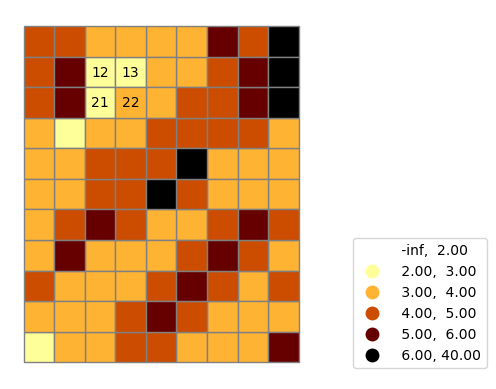

In [16]:
obs = [f for f in os.listdir(out_dir) if f.endswith('ALLCELLS.csv')]
df_obs = pd.read_csv(os.path.join(out_dir,obs[0]))
df_obs['max_gap'] = df_obs['max_gap_hrs']/24
df_geom = gpd.read_file(os.path.join(r'data','gridded_aoi.gpkg'))
df_combo = pd.merge(df_obs, df_geom, on="UNQ")
df_combo.sort_values('UNQ').head(n=5)

gdf = gpd.GeoDataFrame(df_combo, crs="EPSG:7773", geometry='geometry')
fig, ax = plt.subplots()
gdf.plot(column='max_gap', cmap='afmhot_r', legend=True,edgecolor='gray', scheme="User_Defined", classification_kwds=dict(bins=[2,3,4,5,6,40]),legend_kwds={'bbox_to_anchor': (1.6, .4)},ax=ax)
ax.axis('off')
# optional: label selected cells
selected_cells = [12,13,21,22]
gdf_selected = gdf.loc[gdf['UNQ'].isin(selected_cells)]
gdf_selected.apply(lambda x: ax.annotate(str(x.UNQ),
    x.geometry.centroid.coords[0],
    fontsize=10,
    ha='center',
    va='center',
    color='black'), axis=1);

## Actual Fig 6
#### Note that this was originally created with shapefile rather than grid and labels do not quite match UNQ values for grid. Lines 7 and 8 use 'label' instead of 'UNQ' to correct this. If AOI is gridded using make_grid, 'UNQ' is used to label cells as above. 

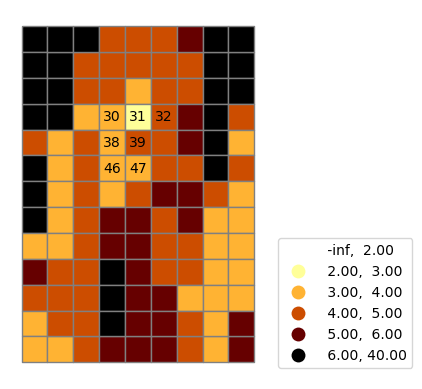

In [110]:
df_obs = pd.read_csv(os.path.join(r'data','Walker2023RS','Img_Lists','ObsStats_2019-10-01to2019-12-20.csv'))
df_obs['max_gap'] = df_obs['max_gap_hrs']/24
df_geom = gpd.read_file(os.path.join(r'data','gridded_aoi.gpkg'))
df_combo = pd.merge(df_obs, df_geom, on="UNQ")

gdf = gpd.GeoDataFrame(df_combo, crs="EPSG:7773", geometry='geometry')
fig, ax = plt.subplots()
gdf.plot(column='max_gap', cmap='afmhot_r', legend=True,edgecolor='gray', scheme="User_Defined", classification_kwds=dict(bins=[2,3,4,5,6,40]),legend_kwds={'bbox_to_anchor': (1.6, .4)},ax=ax)
ax.axis('off')
# optional: label selected cells
selected_cells = [30,31,32,38,39,46,47]
gdf_selected = gdf.loc[gdf['label'].isin(selected_cells)]
gdf_selected.apply(lambda x: ax.annotate(str(x.label),
    x.geometry.centroid.coords[0],
    fontsize=10,
    ha='center',
    va='center',
    color='black'), axis=1);